In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('transformed_data.csv')
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,12/31/2019,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,1/1/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,1/2/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,1/3/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,1/4/2020,0.498,0.0,0.0,0.0,17.477233,7.497754


In [3]:
df.shape

(50418, 9)

# Top 10 Countries with Highest Covid Cases

In [4]:
TOP_10_countries_highest_covid_cases=df.groupby('COUNTRY')['TC'].sum().nlargest(10).sort_values(ascending = False)
TOP_10_countries_highest_covid_cases.head(10)

COUNTRY
United States     3343.050755
China             3128.587021
Brazil            2913.256895
Italy             2873.314489
Spain             2843.820343
India             2825.623737
United Kingdom    2809.857646
Germany           2804.510066
Iran              2803.718251
France            2801.434702
Name: TC, dtype: float64

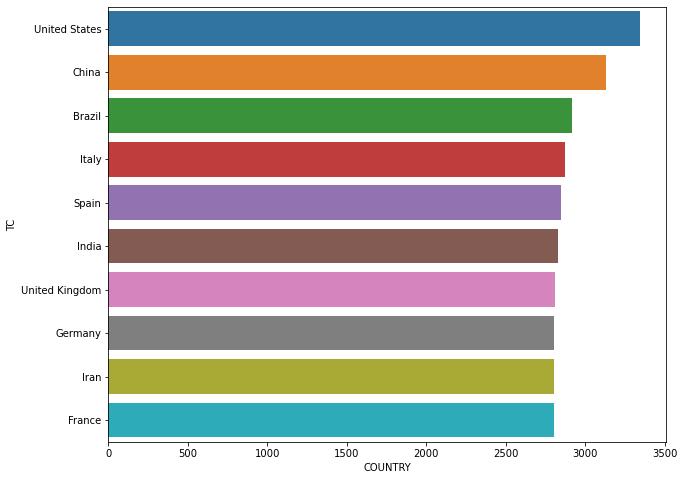

In [5]:
plt.figure(figsize=(10,8))
TOP_10_countries_highest_covid_cases=df.groupby('COUNTRY')['TC'].sum().nlargest(10).sort_values(ascending = False)
sns.barplot(y=TOP_10_countries_highest_covid_cases.index,x=TOP_10_countries_highest_covid_cases,orient = 'h')
plt.xlabel('COUNTRY')
plt.ylabel('TC')
plt.show()

# Total number of deaths among the countries with the highest number of covid-19 cases

In [6]:
no_of_deaths_with_covid_cases=df.groupby('COUNTRY')['TD'].sum().nlargest(10).sort_values(ascending = False)
no_of_deaths_with_covid_cases.head()

COUNTRY
United States     2480.576064
Italy             2327.710204
United Kingdom    2209.519314
China             2205.740166
France            2203.766710
Name: TD, dtype: float64

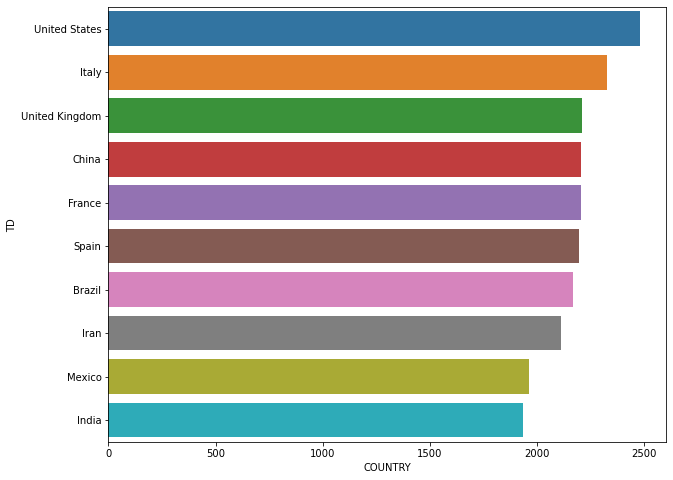

In [7]:
plt.figure(figsize=(10,8))
no_of_deaths_with_covid_cases=df.groupby('COUNTRY')['TD'].sum().nlargest(10).sort_values(ascending = False)
sns.barplot(y=no_of_deaths_with_covid_cases.index,x=no_of_deaths_with_covid_cases,orient = 'h')
plt.xlabel('COUNTRY')
plt.ylabel('TD')
plt.show()

# Percentage of total deaths and total cases among all the countries with the highest number of covid-19 cases

In [8]:
df['percent'] = (df['TD'] / df['TC'].sum()) * 100
total_deaths_and_total_cases = df.groupby('COUNTRY')['percent'].nlargest().sort_values(ascending = False)
total_deaths_and_total_cases.head()

COUNTRY             
United States  48414    0.003608
               48413    0.003607
               48412    0.003606
               48411    0.003605
               48410    0.003604
Name: percent, dtype: float64

<AxesSubplot:xlabel='COUNTRY,None'>

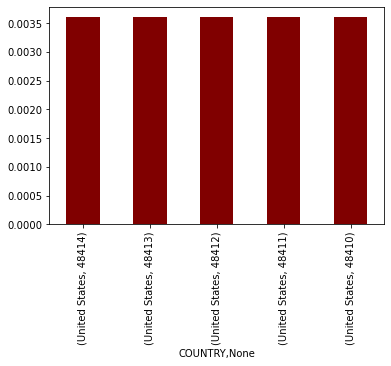

In [9]:
total_deaths_and_total_cases.head().plot(x="TC", y=["TD"], kind="bar", color="maroon")

# calculate the death rate of Covid-19 cases

In [10]:
df['death']= df['TD'] / df['TC']
death_rate= df.groupby('COUNTRY')['death'].nlargest().sort_values(ascending = False)
death_rate.head()

COUNTRY       
Iran     22067    1.000000
France   16562    0.863024
         16561    0.862924
         16560    0.862773
         16559    0.862759
Name: death, dtype: float64

<AxesSubplot:xlabel='COUNTRY,None'>

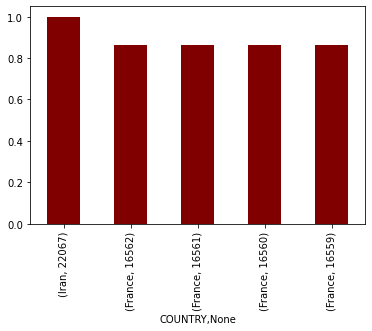

In [11]:
death_rate.head().plot(x="TC", y=["TD"], kind="bar",color = "maroon")

### stringency index-: It is a composite measure of response indicators, including school closures, workplace closures, and travel bans. It shows how strictly countries are following these measures to control the spread of covid-19

In [13]:
stringency_index=df.groupby('COUNTRY')['STI'].sum().nlargest(5).sort_values(ascending = False)
stringency_index.head()

COUNTRY
China          1144.410846
Singapore      1096.836652
Oman           1096.661003
Vietnam        1090.995318
Philippines    1081.362101
Name: STI, dtype: float64

<AxesSubplot:xlabel='COUNTRY'>

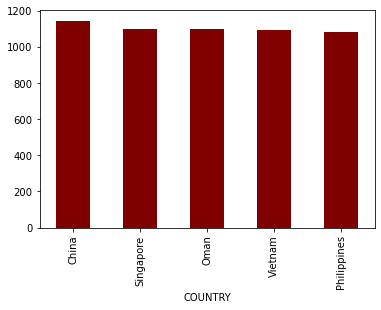

In [14]:
stringency_index.head().plot(x="STI", y=["COUNTRY"], kind="bar",color = "maroon")

# GDP per capita is the primary factor for analyzing the economic slowdowns caused due to the outbreak of covid-19.

In [16]:
df.groupby('COUNTRY')[['GDPCAP']].median()

,GDPCAP
COUNTRY,
Afghanistan,7.497754
Albania,9.376146
Algeria,9.540639
Andorra,0.000000
Angola,8.668969
...,...
Venezuela,9.725856
Vietnam,8.727759
Yemen,7.299221


<AxesSubplot:xlabel='GDPCAP', ylabel='COUNTRY'>

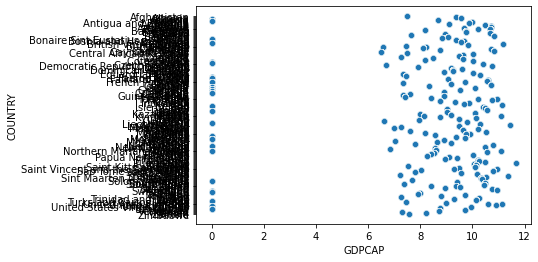

In [27]:
sns.scatterplot(data=df, x='GDPCAP', y='COUNTRY')

# GDP per capita during the rise in the cases of covid-19

In [19]:
df['Year'] = pd.DatetimeIndex(df['DATE']).year  
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,percent,death,Total_GDP ($),Year
0,AFG,Afghanistan,12/31/2019,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,131.040003,2019
1,AFG,Afghanistan,1/1/2020,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,131.040003,2020
2,AFG,Afghanistan,1/2/2020,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,131.040003,2020
3,AFG,Afghanistan,1/3/2020,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,131.040003,2020
4,AFG,Afghanistan,1/4/2020,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,131.040003,2020


In [25]:
df['Month'] = pd.DatetimeIndex(df['DATE']).month
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,percent,death,Total_GDP ($),Year,Month
0,AFG,Afghanistan,12/31/2019,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,131.040003,2019,12
1,AFG,Afghanistan,1/1/2020,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,131.040003,2020,1
2,AFG,Afghanistan,1/2/2020,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,131.040003,2020,1
3,AFG,Afghanistan,1/3/2020,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,131.040003,2020,1
4,AFG,Afghanistan,1/4/2020,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,131.040003,2020,1


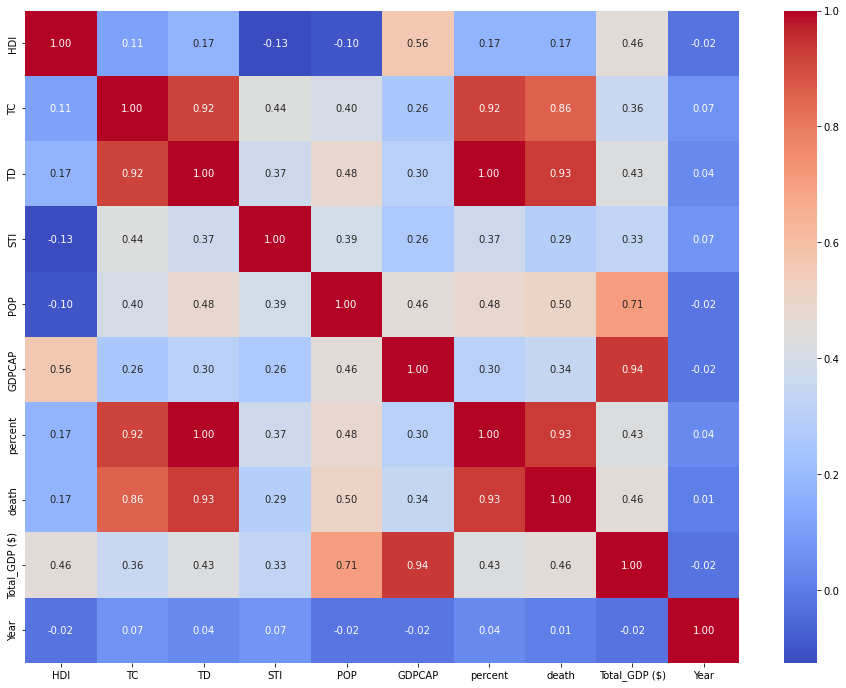

In [21]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

# GDP per capita before covid-19 and during covid-19

In [48]:
Before_covid=df[df.Year == 2019]
Before_covid

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,percent,death,Total_GDP ($),Year,Month
0,AFG,Afghanistan,12/31/2019,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,131.040003,2019,12
519,DZA,Algeria,12/31/2019,0.754,0.0,0.0,0.0,17.596309,9.540639,0.0,NaN,167.880037,2019,12
1924,ARM,Armenia,12/31/2019,0.755,0.0,0.0,0.0,14.901792,9.081095,0.0,NaN,135.324582,2019,12
2434,AUS,Australia,12/31/2019,0.939,0.0,0.0,0.0,17.054184,10.706581,0.0,NaN,182.592001,2019,12
2728,AUT,Austria,12/31/2019,0.908,0.0,0.0,0.0,16.013446,10.724075,0.0,NaN,171.729398,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45484,THA,Thailand,12/31/2019,0.755,0.0,0.0,0.0,18.061144,9.697550,0.0,NaN,175.148842,2019,12
47533,ARE,United Arab Emirates,12/31/2019,0.863,0.0,0.0,0.0,16.107075,11.116819,0.0,NaN,179.059434,2019,12
47827,GBR,United Kingdom,12/31/2019,0.922,0.0,0.0,0.0,18.033340,10.590447,0.0,NaN,190.981131,2019,12
48121,USA,United States,12/31/2019,0.924,0.0,0.0,0.0,19.617637,10.900906,0.0,NaN,213.850007,2019,12


In [63]:
Before_covid.groupby('COUNTRY')[['GDPCAP']].mean().sort_values(by='GDPCAP', ascending=False).head()

,GDPCAP
COUNTRY,
Qatar,11.669379
Luxembourg,11.454003
Singapore,11.356685
Ireland,11.117440
United Arab Emirates,11.116819


In [50]:
During_covid=df[(df.Year == 2020)|(df.Year ==2021)]
During_covid

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,percent,death,Total_GDP ($),Year,Month
1,AFG,Afghanistan,1/1/2020,0.498,0.000000,0.000000,0.000000,17.477233,7.497754,0.000000,NaN,131.040003,2020,1
2,AFG,Afghanistan,1/2/2020,0.498,0.000000,0.000000,0.000000,17.477233,7.497754,0.000000,NaN,131.040003,2020,1
3,AFG,Afghanistan,1/3/2020,0.498,0.000000,0.000000,0.000000,17.477233,7.497754,0.000000,NaN,131.040003,2020,1
4,AFG,Afghanistan,1/4/2020,0.498,0.000000,0.000000,0.000000,17.477233,7.497754,0.000000,NaN,131.040003,2020,1
5,AFG,Afghanistan,1/5/2020,0.498,0.000000,0.000000,0.000000,17.477233,7.497754,0.000000,NaN,131.040003,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,10/15/2020,0.535,8.994048,5.442418,4.341855,16.514381,7.549491,0.001596,0.605113,124.675163,2020,10
50414,ZWE,Zimbabwe,10/16/2020,0.535,8.996528,5.442418,4.341855,16.514381,7.549491,0.001596,0.604946,124.675163,2020,10
50415,ZWE,Zimbabwe,10/17/2020,0.535,8.999496,5.442418,4.341855,16.514381,7.549491,0.001596,0.604747,124.675163,2020,10
50416,ZWE,Zimbabwe,10/18/2020,0.535,9.000853,5.442418,4.341855,16.514381,7.549491,0.001596,0.604656,124.675163,2020,10


In [62]:
During_covid.groupby('COUNTRY')[['GDPCAP']].mean().sort_values(by='GDPCAP', ascending=False).head(10)

,GDPCAP
COUNTRY,
Qatar,11.669379
Luxembourg,11.454003
Singapore,11.356685
Brunei,11.181769
Ireland,11.117440
United Arab Emirates,11.116819
Kuwait,11.090272
Norway,11.079062
Switzerland,10.957977


# Human Development Index

In [22]:
HDI=df.groupby('COUNTRY')['HDI'].sum().nlargest(10).sort_values(ascending = False)
HDI.head()

COUNTRY
Norway         280.182
Switzerland    277.536
Australia      276.066
Ireland        275.772
Germany        275.184
Name: HDI, dtype: float64

<AxesSubplot:xlabel='COUNTRY'>

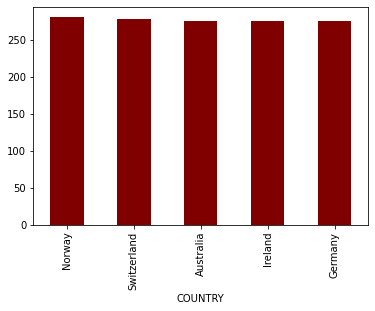

In [23]:
HDI.head().plot(x="STI", y=["COUNTRY"], kind="bar",color = "maroon")